# In this section we will define some basic properties for Radar
# ⠀
# $ wave ⠀
equation : ⠀
 y(t) = A\cos(2\pi\cdot f_c \cdot t + \phi) $

# $ wave length : \lambda = \frac{\textrm{speed of light}}{\textrm{frequency}} $

# $ Frequency : F = \frac{d\varphi}{dt} $

# $ Max Range : R_{max} =  \sqrt[4]{\frac{P_s . G^2 . \lambda^2 . \sigma}{P_E . (4 \pi)^3}}  $

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# Declaring the resources:

#Operating frequency in Hertz
fc = 77.0e9

#Transmitted power (W)
Pt = 3e-3

#Antenna Gain (linear)
G =  10000

#Minimum Detectable Power
Ps = 1e-10

#RCS of a car
RCS = 100

#Speed of light
c = 3*10**8

In [ ]:
#lamda from frequency(refer to the equations above) in meters
lamda = c/fc
lamda



0.003896103896103896

In [ ]:
R_max = ((Pt*(G**2)*(lamda**2)*RCS)/(Ps *(math.pi * 4)**3))**0.25
print(f"The maximum range of the radar is {R_max:.2f} meters.")

The maximum range of the radar is 218.87 meters.


# Resolving Targets

# $ d_{res} = \frac{c}{2B_{sweep}}
 ⠀
  $


*   B is the bandwidth of the chirp



# $ f_{beat} = f_ {ramping} - f_{received} $
*   We use the frequency difference to give estimations based on the change

# $ T_{chirp} =5.5\cdot 2 \cdot R_{max}/c $
# $ R = \frac {c . f_{beat} . T_s }{2 B_{sweep}} $




In [ ]:
# The given :


# in Meters
radar_max_range = 300
range_resolution = 1

# Speed of light
c = 3e8

In [ ]:
# Calculating Bandwidth of the chirp
B_sweep = c / (2 * range_resolution)
B_sweep

150000000.0

In [ ]:
# Calculating the sweep time of the chirp
T_sweep = (5.5 * 2 * radar_max_range)/c
T_sweep

1.1e-05

In [ ]:
# In MHz
f_beats = [0,1.1,13,24]

for f in f_beats:
  R = (c*f*1000000*T_sweep)/(2*B_sweep)
  print("The range for ",f," MHz is : ",R," m")

The range for  0  MHz is :  0.0  m
The range for  1.1  MHz is :  12.1  m
The range for  13  MHz is :  143.0  m
The range for  24  MHz is :  264.0  m


# Now using the doppler effect we will estimate the velocity
# $ f_D = \frac{2\nu_r}{\lambda} $
# $ f_{beat} = f_R + f_D $

# $ \Delta \varphi = \frac{\Delta x}{\lambda} \qquad (\lambda = 2\pi \,\, or \,\, 360 \, degree) $
# $ \Delta \varphi = f*\frac{\Delta x}{c} \qquad (\lambda = f/c) $
# $\Delta f = \frac{\Delta\varphi}{\Delta t} $




In [ ]:
# Given/ specifications :


# previously assigned to 77 GHz
fc

# previously assigned to 3e8
c


# previously calculated
lamda

0.003896103896103896

In [ ]:
# Input


f_doppler = [3,-4.5,11,-3]
v_doppler = []
for f in f_doppler:
  v = (f * 1000 * lamda )/ 2
  v_doppler.append(v)
  print("The doppler velocity for doppler shift of ",f ," KHz is :",v," m/s")


The doppler velocity for doppler shift of  3  KHz is : 5.8441558441558445  m/s
The doppler velocity for doppler shift of  -4.5  KHz is : -8.766233766233766  m/s
The doppler velocity for doppler shift of  11  KHz is : 21.428571428571427  m/s
The doppler velocity for doppler shift of  -3  KHz is : -5.8441558441558445  m/s


# In this section we will use FFT to anaylze frequency that calculates range

In [ ]:
# Sampling parameters
Fs = 1000  # Sampling frequency
T = 1 / Fs  # Sampling period
L = 1500  # Length of signal
t = np.arange(0, L) * T  # Time vector

In [ ]:
# Define a signal containing a 77 Hz sinusoid of amplitude 0.7 and a 43 Hz sinusoid of amplitude 2
S = 0.7 * np.sin(2 * np.pi * 77 * t) + 2 * np.sin(2 * np.pi * 43 * t)

# Corrupt the signal with noise
X = S + 2 * np.random.randn(len(t))

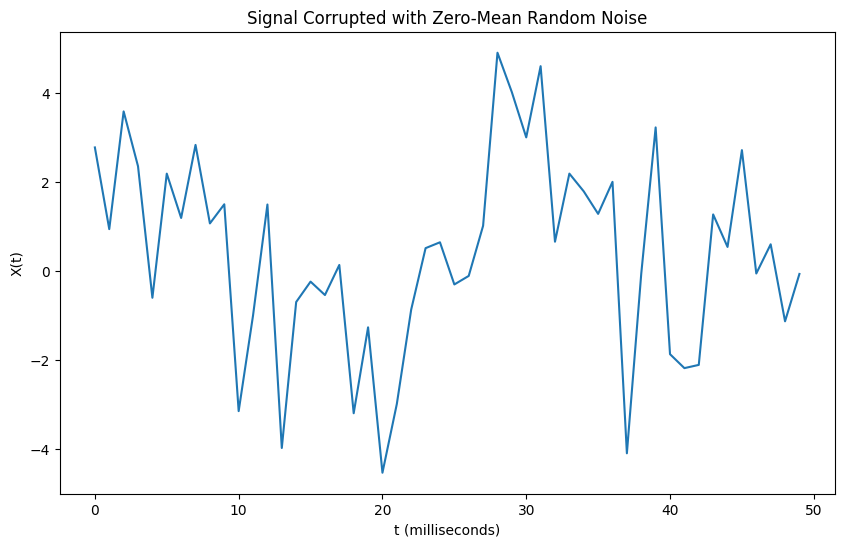

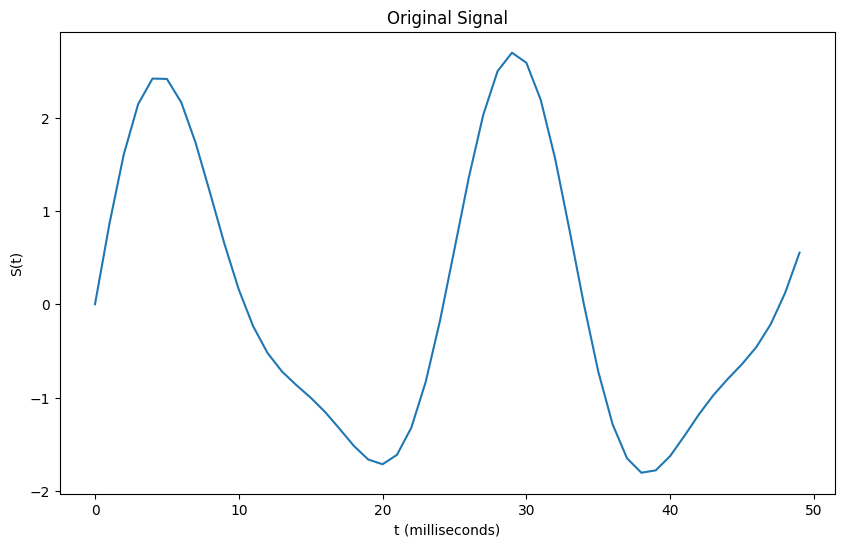

In [ ]:
# Plot the noisy signal in the time domain
plt.figure(figsize=(10, 6))
plt.plot(1000 * t[:50], X[:50])
plt.title('Signal Corrupted with Zero-Mean Random Noise')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')
plt.show()




# Plot the noisy signal in the time domain
plt.figure(figsize=(10, 6))
plt.plot(1000 * t[:50], S[:50])
plt.title('Original Signal')
plt.xlabel('t (milliseconds)')
plt.ylabel('S(t)')
plt.show()

In [ ]:
# Compute the Fourier transform of the signal
signal_fft = np.fft.fft(X)


#Compute the two-sided spectrum P2. Then compute the single-sided spectrum P1 based on P2 and the even-valued signal length L.
P2 = np.abs(signal_fft / L)
P1 = P2[:L//2]
P1[1:-1] = 2 * P1[1:-1]


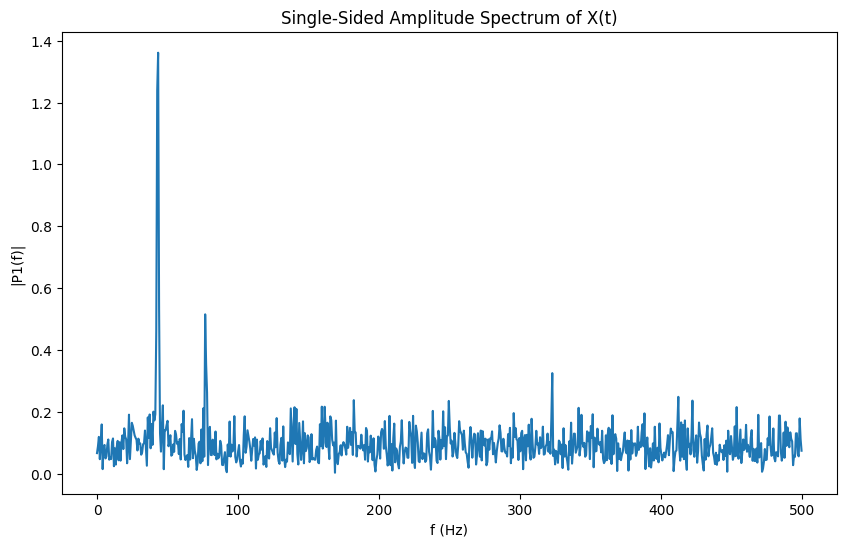

In [ ]:
# Define the frequency domain f and plot the single-sided amplitude spectrum
f = Fs * np.arange((L//2)) / L
plt.figure(figsize=(10, 6))
plt.plot(f, P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()

# In this section we practice to apply 2D FFT, a second FFT in order to get the doppler frequency


In [ ]:
# Generate 2D data (similar to peaks(20) in MATLAB)
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))




In [ ]:
# Repeat the data to create a larger 2D matrix
signal = np.tile(Z, (5, 10))

# Compute 2D FFT
signal_fft = np.fft.fft2(signal)

# Shift zero-frequency component to the center
signal_fft_shifted = np.fft.fftshift(signal_fft)

# Compute the magnitude spectrum (absolute value)
magnitude_spectrum = np.abs(signal_fft_shifted)



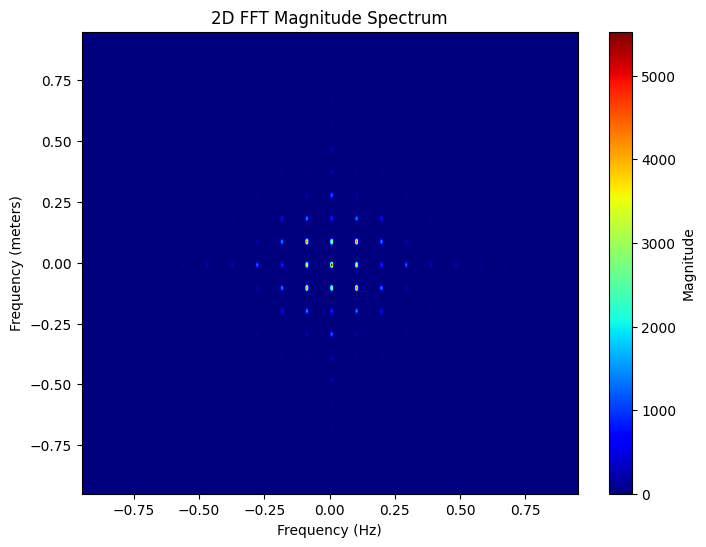

In [ ]:
# Determine the units for range and Doppler axes
# Example units (replace with actual units from your radar system)
range_units = "meters"
doppler_units = "Hz"

# Determine the frequency resolution
M, N = signal.shape
range_resolution = 1 / (M * (x[1] - x[0]))
doppler_resolution = 1 / (N * (y[1] - y[0]))

# Plot the magnitude spectrum using imagesc-like visualization
plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='jet', aspect='auto', extent=[-N/2*doppler_resolution, N/2*doppler_resolution, -M/2*range_resolution, M/2*range_resolution])
plt.colorbar(label='Magnitude')
plt.title('2D FFT Magnitude Spectrum')
plt.xlabel(f'Frequency ({doppler_units})')
plt.ylabel(f'Frequency ({range_units})')
plt.grid(False)
plt.show()

# In this section we will implement a 1-D CA-CFAR



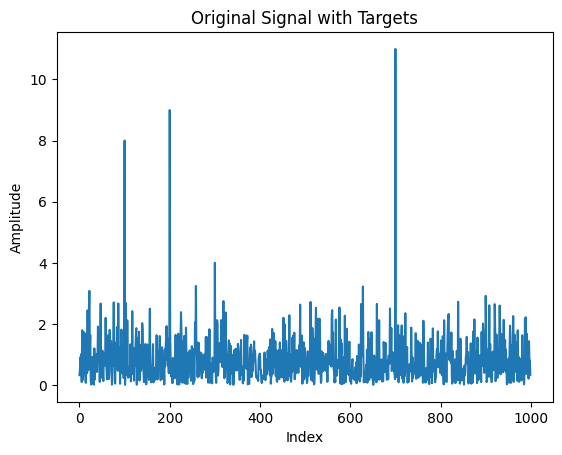

In [ ]:
# Close and delete all currently open figures
plt.close('all')

# Data points
Ns = 1000

# Generate random noise
s = np.abs(np.random.randn(Ns))

# Targets location. Assigning bin 100, 200, 300, and 700 as Targets with the amplitudes of 8, 9, 4, 11.
s[[100, 200, 300, 700]] = [8, 9, 4, 11]

# Plot the output
plt.figure()
plt.plot(s)
plt.title('Original Signal with Targets')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()



In [ ]:
# Task 1: Apply CFAR to detect the targets by filtering the noise.

# 1. Define the following:
# 1a. Training Cells
T = 12
# 1b. Guard Cells
G = 4

# Offset: Adding room above noise threshold for desired SNR
offset = 6

# Vector to hold threshold values
threshold_cfar = np.zeros(Ns)
# Vector to hold final signal after thresholding
signal_cfar = np.zeros(Ns)



In [ ]:
# 2. Slide window across the signal length
for i in range(Ns - (G + T + 1)):
    # 3. sum up the noise of training cells
    noise_level = np.sum(s[i:i + T])

    # 4 & 5. average the summed noise and scale with the offset
    threshold = (noise_level / T) * offset
    threshold_cfar[i + T + G] = threshold

    # 6. measure the CUT signal level
    signal = s[i + T + G]

    # 7 & 8. Filter the signal above the threshold
    if signal > threshold:
        signal_cfar[i + T + G] = signal




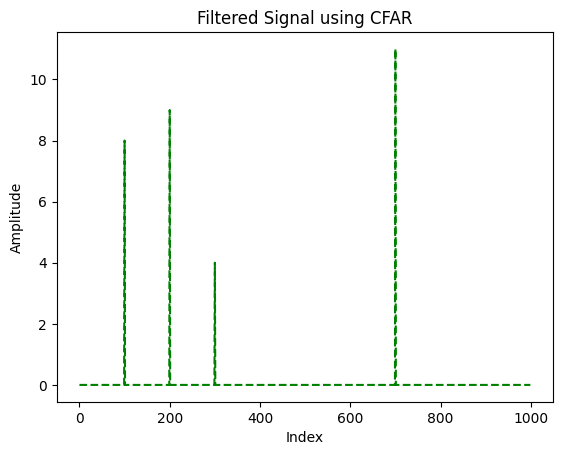

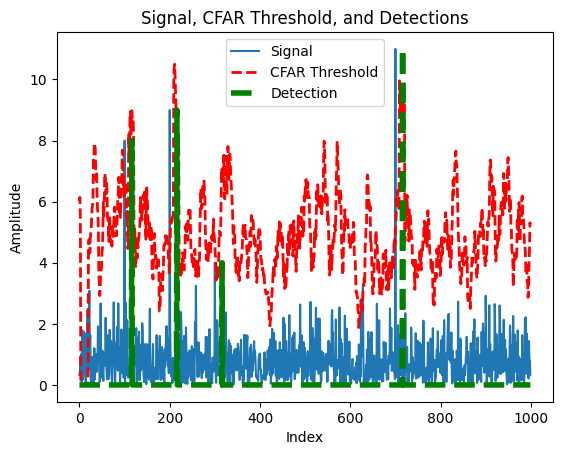

In [ ]:
# Plot the filtered signal
plt.figure()
plt.plot(signal_cfar, 'g--')
plt.title('Filtered Signal using CFAR')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

# Plot original signal, threshold, and filtered signal within the same figure
plt.figure()
plt.plot(s, label='Signal')
plt.plot(np.roll(threshold_cfar, G), 'r--', linewidth=2, label='CFAR Threshold')
plt.plot(np.roll(signal_cfar, T + G), 'g--', linewidth=4, label='Detection')
plt.title('Signal, CFAR Threshold, and Detections')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Kalman Tracking

First : Prediction

# $ x_k = A x_{k-1} + Bu_k   $
# $ P_k  = A P_{k-1} A^T  + Q $


Second : Update

# $ k_k = \frac {P_k C^T}{C P_k C^T + R} $
# $ x_k = x_k + k_k (y_k - C x_k) $
# $ P_k = (I-  k _k C) P_k$